# The optimization problem

$$
\begin{array}{lll}
\textrm{minimize}   & f(x)             & \\
\textrm{subject to} & g_{i}(x) \leq 0, & i = 1, \ldots, m, \\
                    & h_{j}(x) =    0, & j = 1, \ldots, p, \\
\end{array}
$$

- $x = (x_{1}, x_{2}, \ldots)$:
  **optimization variables**

- $f \colon \mathcal{X} \to \mathbb{R}$:
  **objective function**

- $g_{i} \colon \mathcal{X} \to \mathbb{R}, i = 1, \ldots, m$:
  **inequality constraint** functions

- $h_{j} \colon \mathcal{X} \to \mathbb{R}, j = 1, \ldots, p$:
  **equality constraint** functions

**Decision set** $\mathcal{X}$ may be finite $\mathbb{R}^{n}$,
a set of matrices,
a discrete set $\mathbb{Z}^{n}$,
or an infinite dimensional set.

**Constraint functions** $g_{i}(x)$ and $h_{j}(x)$
limit the decision set $\mathcal{X}$
to a set of **feasible points** $x \in X \subset \mathcal{X}$.

The **Optimal solution** $x^{*} \in X$ has smallest value of $f$
among all feasible points that "satisfy the constraints":

$$
\forall x \in X \colon f(x^{*}) \leq f(x).
$$

## Classes of optimizations problems

- Unconstrained optimization: $m = p = 0$
- Constrained optimization $m > 0$ or $p > 0$
- Linear Programming: $f$ linear, $g_{i}$, $h_{j}$ affin-linear
- Quadratic Programming: $f(x) = \frac{1}{2}x^{T}Ax + b^{T}x +c$, $g_{i}$, $h_{j}$ affin-linear
- Convex Optimization: $f$ convex, $g_{i}$ convex, $h_{j}$ affin-linear

## Local and global optima

Consider the following piece-wise defined function:

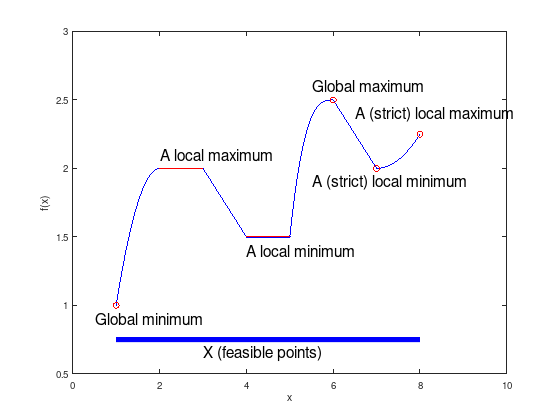

In [1]:
f = {@(x) -(x - 2).^2 + 2, ...
     @(x) 2, ...
     @(x) -(x - 7) / 2, ...
     @(x) 3/2, ...
     @(x) (x - 6).^3 + 5/2, ...
     @(x) -(x - 11) / 2, ...
     @(x) (x - 7).^2 / 4 + 2};
for i = 1:7
  fun = f{i};
  x = linspace (i, i + 1, 40);
  y = fun (x);
  plot (x, y, 'b');
  hold on;
end
xlim ([0, 10]);
ylim ([0.5, 3]);
xlabel ('x');
ylabel ('f(x)');
fmt = {'FontSize', 16};
plot (1, 1.00, 'ro'); text (0.5, 0.9, 'Global minimum', fmt{:});
plot (6, 2.50, 'ro'); text (5.5, 2.6, 'Global maximum', fmt{:});
plot (7, 2.00, 'ro'); text (5.5, 1.9, 'A (strict) local minimum', fmt{:});
plot (8, 2.25, 'ro'); text (6.5, 2.4, 'A (strict) local maximum', fmt{:});
plot (2:3, [2, 2],     'r'); text (2, 2.1, 'A local maximum', fmt{:});
plot (4:5, [3, 3] / 2, 'r'); text (4, 1.4, 'A local minimum', fmt{:});
plot ([1, 8], [0.75, 0.75], 'b', 'LineWidth', 6);
text (3, 0.65, 'X (feasible points)', fmt{:});

Local and global optima of a two-dimensional function.

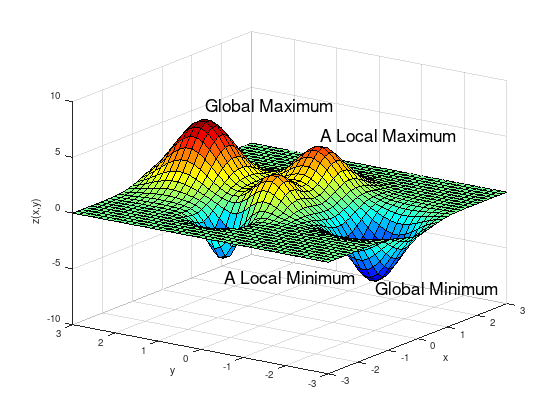

In [2]:
N = 3;
[X,Y] = meshgrid (linspace (-N, N, 40));

% Gaussian probability density function (PDF)
GAUSS = @(sigma, mu)  1 / (sigma * sqrt (2*pi)) * ...
                      exp (-0.5 * ((X - mu(1)).^2 + (Y - mu (2)).^2) / sigma^2);

Z = 9 * GAUSS (0.6, [ 0.0,  2.0]) + 5 * GAUSS (0.5, [ 1.0,  0.0]) ...
  + 3 * GAUSS (0.4, [-0.5,  0.0]) - 3 * GAUSS (0.3, [-1.5,  0.5]) ...
  - 7 * GAUSS (0.5, [ 0.0, -2.0]);

surf (X, Y, Z);
xlabel ('x');
ylabel ('y');
zlabel ('z(x,y)');
colormap ('jet');
props = {'FontSize', 18};
text ( 0.0, -2.0, -6.2, 'Global Minimum', props{:});
text ( 0.0,  2.0,  7.2, 'Global Maximum', props{:});
text (-1.5,  0.5, -5.5, 'A Local Minimum', props{:});
text ( 1.0,  0.0,  5.0, 'A Local Maximum', props{:});
view (-55, 21)

## Two-dimensional constrained example

A simple problem can be defined by the constraints

$$
\begin{array}{l}
x_1 \geq 0, \\
x_2 \geq 0, \\
x_1^2 + x_2^2 \geq 1, \\
x_1^2 + x_2^2 \leq 2,
\end{array}
$$

with an objective function to be maximized

$$
f(x) = x_1 + x_2
$$

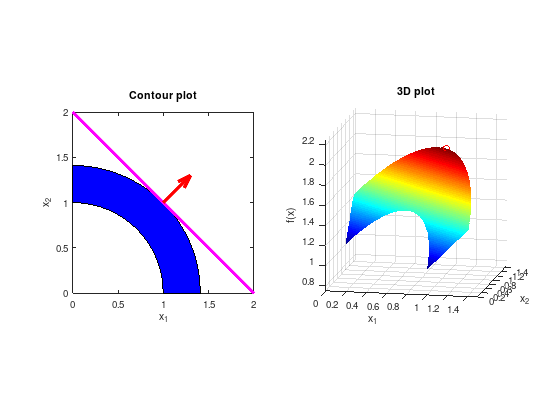

In [3]:
subplot (1, 2, 1);

% Visualize constrained set of feasible solutions (blue).
circ = @(x) sqrt (max(x)^2 - x.^2);
x_11 = 0:0.01:sqrt(2);
x_21 = circ (x_11);
x_12 = 1:-0.01:0;
x_22 = circ (x_12);
area ([x_11, x_12], [x_21, x_22], 'FaceColor', 'blue');

% Visualize level set of the objective function (magenta)
% and its scaled gradient (red arrow).
hold on;
plot ([0 2], [2 0], 'LineWidth', 4, 'm');
quiver (1, 1, 0.3, 0.3, 'LineWidth', 4, 'r');
axis equal;
xlim ([0 2]);
ylim ([0 2]);
xlabel ('x_1');
ylabel ('x_2');
title ('Contour plot');

subplot (1, 2, 2);
[X1, X2] = meshgrid (linspace (0, 1.5, 500));
FX = X1 + X2;

% Remove infeasible points.
FX((X1.^2 + X2.^2) < 1) = inf;
FX((X1.^2 + X2.^2) > 2) = inf;
surf (X1, X2, FX);
shading flat;
colormap ('jet');
hold on;
plot3 (1, 1, 2, 'ro');
axis equal;
xlabel ('x_1');
ylabel ('x_2');
zlabel ('f(x)');
title ('3D plot');
view (11, 12);

The intersection of the level-set of the objective function ($f(x) = 2 = const.$)
and the constrained set of feasible solutions represents the solution.

> $\max f(x) = -\min -f(x)$

In these lectures we are mainly interested in methods for computing local minima.

## Notation

Vectors $x \in \mathbb{R}^{n}$ are column vectors.
$x^{T}$ is the transposed row vector.

A norm in $\mathbb{R}^{n}$ is denoted by $\lVert \cdot \rVert$
and corresponds to the Euclidean norm:

$$
\lVert x \rVert = \lVert x \rVert_{2} = \left( x^{T}x \right)^{\frac{1}{2}}
= \sqrt{x_{1}^{2} + \ldots + x_{n}^{2}}.
$$

Is $\lVert \cdot \rVert$ a norm on $\mathbb{R}^{n}$, then

$$
\lVert A \rVert := \max\left\{ \lVert Ax \rVert \colon \lVert x \rVert \leq 1 \right\}
$$

defines the matrix norm (operator norm) for $A \in \mathbb{R}^{n \times n}$.

For the Euclidean vector norm this is

$$
\lVert A \rVert = \sqrt{\lambda_{\max}(A^{T}A)} = \sigma_{\max}(A),
$$

where $\lambda_{\max}(\cdot)$ denotes the maximal eigenvalue
and $\sigma_{\max}(\cdot)$ the maximal singular value of a matrix.

The open ball with center $x \in \mathbb{R}^{n}$ and radius $\varepsilon > 0$
is denoted by

$$
B_{\varepsilon}(x) := \{ y \in \mathbb{R}^{n} \colon \lVert y - x \rVert < \varepsilon \}.
$$

The interior of a set $X \subset \mathbb{R}^{n}$ is denoted by $int(X)$
and the border by $\partial X$.
For $x \in int(X)$ and $\varepsilon > 0$ there is $B_{\varepsilon}(x) \subset X$.

A subset $X \subset \mathbb{R}^{n}$ is called **"open"**, if $int(X) = X$.
("The border $\partial X$ is not included.")

A closed subset $X \subset \mathbb{R}^{n}$ is called **"compact"**,
if every open cover of $X$ has a finite sub-cover.
("No holes in $X$, border included.").

Let $f \colon \mathbb{R}^{n} \to \mathbb{R}$ be continuously differentiable
($f \in C^{1}(\mathbb{R}^{n},\mathbb{R})$),
then the **gradient** of $f$ in $x$ is denoted by the column vector:

$$
\nabla f(x) =
\begin{pmatrix}
\dfrac{\strut\partial}{\strut\partial x_{1}} f(x) \\
 \vdots \\
\dfrac{\strut\partial}{\strut\partial x_{n}} f(x)
\end{pmatrix}
$$

Let $f \colon \mathbb{R}^{n} \to \mathbb{R}$ be twice continuously differentiable
($f \in C^{2}(\mathbb{R}^{n},\mathbb{R})$),
then the symmetric **Hessian matrix** of $f$ in $x$ is denoted by:

$$
\nabla^{2} f(x) =
\begin{pmatrix}
\dfrac{\strut\partial^{2}}{\strut\partial x_{1}\strut\partial x_{1}} f(x)
& \cdots
& \dfrac{\strut\partial^{2}}{\strut\partial x_{1}\strut\partial x_{n}} f(x) \\
\vdots & \ddots & \vdots \\
\dfrac{\strut\partial^{2}}{\strut\partial x_{n} \strut\partial x_{1}} f(x)
& \cdots
& \dfrac{\strut\partial^{2}}{\strut\partial x_{n} \strut\partial x_{n}} f(x)
\end{pmatrix}
$$

A real symmetric matrix $A \in \mathbb{R}^{n \times n}$ is positive semi-definte,
if $d^{T}Ad \geq 0$ for all $d \in \mathbb{R}^{n} \setminus \{ 0 \}$
and is denoted by $A \succeq 0$.

A real symmetric matrix $A \in \mathbb{R}^{n \times n}$ is positive definte,
if $d^{T}Ad > 0$ for all $d \in \mathbb{R}^{n} \setminus \{ 0 \}$
and is denoted by $A \succ 0$.

The **Landau symbol** is defined by

$$
\phi(d) = o\left(\lVert d \rVert^{k}\right)
\iff \lim_{d \to 0} \frac{\phi(d)}{\lVert d \rVert^{k}} = 0.
$$

**Taylor's theorem** (only linear and quadratic)

Let $f \in C^{1}(\mathbb{R}^{n},\mathbb{R})$, $X \subset \mathbb{R}^{n}$ open, $x \in X$, $d \in \mathbb{R}^{n}$
and $\lVert d \rVert$ sufficiently small, then:

$$
f(x + d) = f(x) + \nabla f(x)^{T}d + o(\lVert d \rVert).
$$

Additionally, if $f \in C^{2}(\mathbb{R}^{n},\mathbb{R})$ and for $0 < \theta < 1$,
the remainder is expressible by

$$
f(x + d) = f(x) + \nabla f(x)^{T}d + \frac{1}{2}d^{T}\nabla^{2} f(x + \theta d)d.
$$

Let $f \in C^{2}(\mathbb{R}^{n},\mathbb{R})$, $X \subset \mathbb{R}^{n}$ open, $x \in X$, $d \in \mathbb{R}^{n}$
and $\lVert d \rVert$ sufficiently small, then:

$$
f(x + d) = f(x) + \nabla f(x)^{T}d + \frac{1}{2}d^{T}\nabla^{2} f(x)d + o(\lVert d \rVert^{2}).
$$

## Extreme value theorem

> Let $X \subset \mathbb{R}^{n}$ non-empty and compact
> and $f \colon \mathbb{R}^{n} \to \mathbb{R}$ continuous.
> Then there exists a **global minimum** of $f$ over $X$.

If a real-valued function $f$ is continuous on the closed interval $[a,b]$,
then $f$ must attain a maximum and a minimum, each at least once!